## Imports

In [38]:
from __future__ import division

import collections
import gzip
from StringIO import StringIO
from urllib import urlopen

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from community import community_louvain as community
%matplotlib inline

In [2]:
#url = 'http://snap.stanford.edu/data/facebook_combined.txt.gz'
url = 'https://github.com/AllenDowney/ThinkComplexity2/blob/master/code/facebook_combined.txt.gz?raw=true'
inmemory = StringIO(urlopen(url).read())
with gzip.GzipFile(fileobj=inmemory, mode='rb') as f:
    G = nx.read_edgelist(f, nodetype=int)
    L = len(G.edges())
    N = len(G.nodes())
    print "Number of vertices N =  ", N, "\nNumber of edges L = ", L

Number of vertices N =   4039 
Number of edges L =  88234


In [37]:
help(com)

Help on package community:

NAME
    community

FILE
    /home/mk/workspace/mkobbi_udm_social_project/venv/local/lib/python2.7/site-packages/community/__init__.py

PACKAGE CONTENTS
    app
    community_louvain
    community_status




Generating a random subgraph of G to test code

In [3]:
with open("facebook/698.edges", mode='r') as g:
    G = nx.read_edgelist(g, nodetype=int)
    subgraphs = {key: len(key.edges()) for key in nx.connected_component_subgraphs(G)}
    G = max(subgraphs, key=subgraphs.get)
    L = len(G.edges())
    N = len(G.nodes())
    print "Number of vertices N =  ", N, "\nNumber of edges L = ", L

Number of vertices N =   40 
Number of edges L =  220


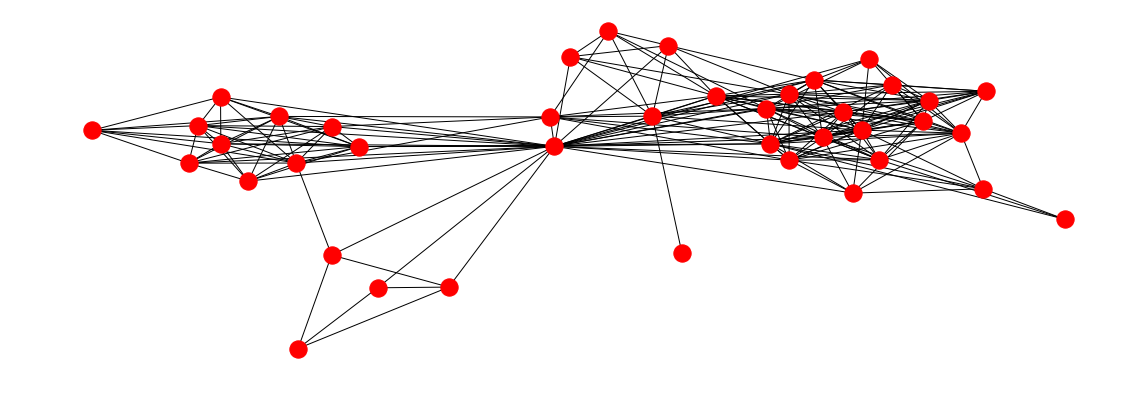

In [4]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
nx.draw(G, with_labels=False)
plt.show()

In [5]:
print len(nx.to_undirected(G).edges())

220


### Draw the graph if small enough; for large graphs this may be unfeasible.

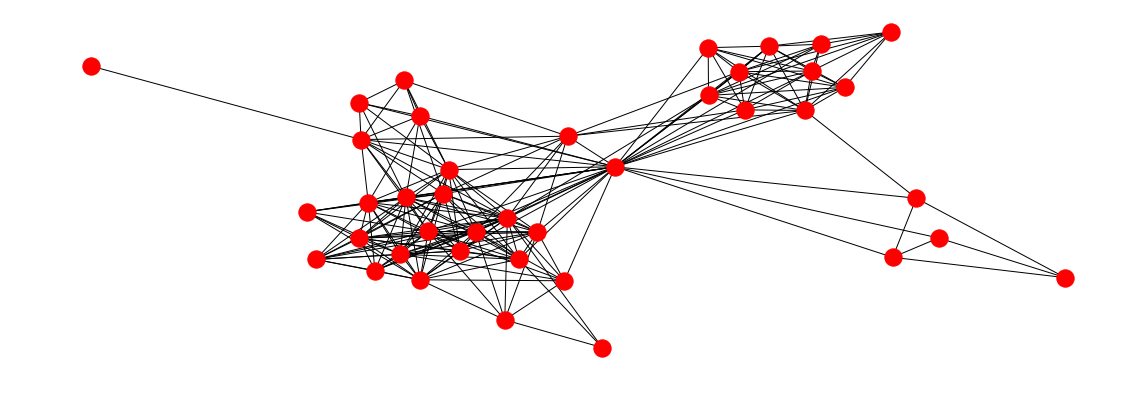

In [6]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
nx.draw(G, with_labels=False)
plt.show()

### Draw the histogram of degrees. Compare the distribution with the distribution for a random graph having the same average degree. Discuss the results

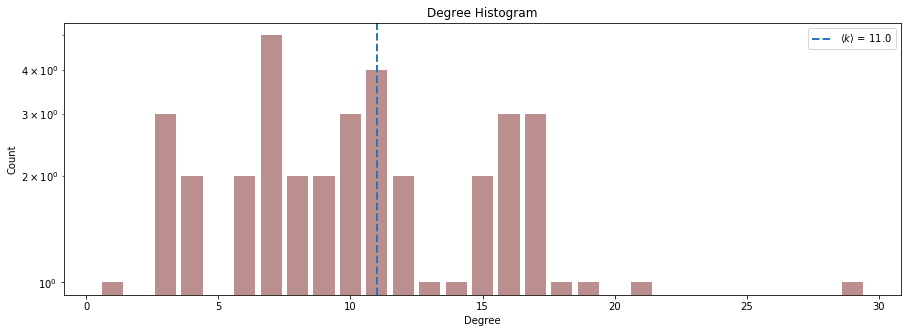

In [209]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
#print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

avg = 2*L/N
#fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color=random.choice(colors), log=True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.set_xticks([d + 0.4 for d in deg])
#plt.set_xticklabels(deg)
deg_line = plt.axvline(avg, color=random.choice(colors), 
                       linestyle='dashed', linewidth=2, 
                       label=r'$\langle k \rangle$ = '+str(avg))
plt.legend(handles=[deg_line])
plt.show()

Let $$\mathbb{R}$$ be a random graph

In [9]:
avg_degree = 2*L/N #parce que le graphe est non oriente => les liens comptent double {(i,j), (j,i)}
p = avg_degree/(N-1)
print "Average degree <k> = ", avg_degree, "\nProbabilty p = ", p
R = nx.gnm_random_graph(n=N, m=L, seed=42, directed=False)

Average degree <k> =  8.85245901639 
Probabilty p =  0.147540983607


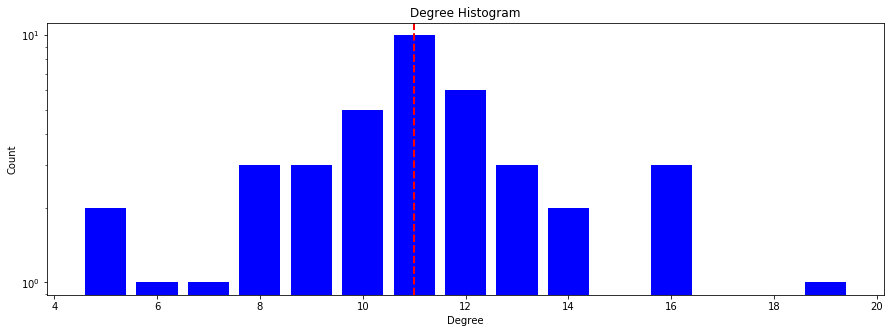

In [12]:
rnd_degree_sequence = sorted([d for n, d in R.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
rnd_degreeCount = collections.Counter(rnd_degree_sequence)
rnd_deg, cnt = zip(*rnd_degreeCount.items())

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

avg = 2*L/N
#fig, ax = plt.subplots()
plt.bar(rnd_deg, cnt, width=0.80, color='b', log=True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in rnd_deg])
#ax.set_xticklabels(rnd_deg)
line = plt.axvline(avg, color='r', linestyle='dashed', linewidth=2)
plt.show()

### Draw the histogram of clustering coefficient, and the average clustering coefficient. Compare it with the one of a random graph and discuss the results.

0.724919061913


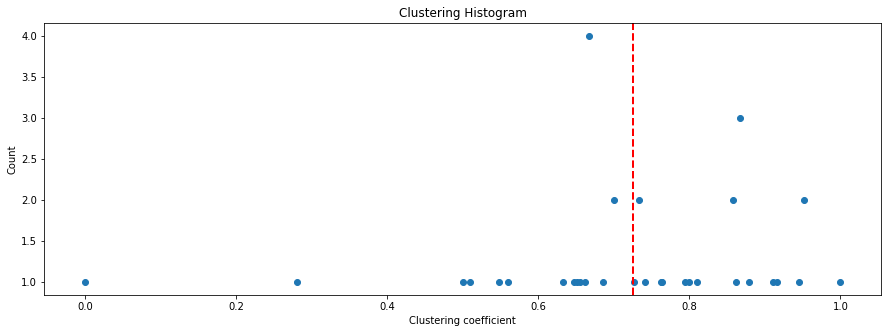

In [147]:
clust_coefficients = nx.clustering(G)
clustering_sequence = sorted(list(clust_coefficients.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
clusteringCount = collections.Counter(clustering_sequence)
clus, cnt = zip(*clusteringCount.items())

avg_clust=sum(clust_coefficients.values()) / len(clust_coefficients)
print avg_clust

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
#plt.bar(clus, cnt, width=0.80, color='b', log=True)
plt.scatter(clus, cnt)
plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(avg_clust, color='r', linestyle='dashed', linewidth=2)
plt.show()

0.367802123362


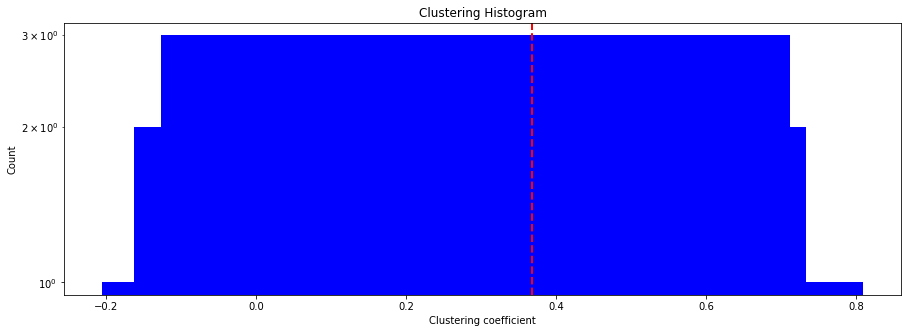

In [14]:
clust_coefficients = nx.clustering(R)
clustering_sequence = sorted(list(clust_coefficients.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
clusteringCount = collections.Counter(clustering_sequence)
clus, cnt = zip(*clusteringCount.items())

avg_clust=sum(clust_coefficients.values()) / len(cnt)
print avg_clust

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(clus, cnt, width=0.80, color='b', log=True)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(avg_clust, color='r', linestyle='dashed', linewidth=2)
plt.show()

### Draw the histogram of distances in the graphs, the diameter and the average distance. Compare with random graphs and discuss the results

In [16]:
path = dict(nx.shortest_path_length(G)) 

In [17]:
reform = {(outerKey, innerKey): values for outerKey, innerDict in path.iteritems() for innerKey, values in innerDict.iteritems()}

2.0


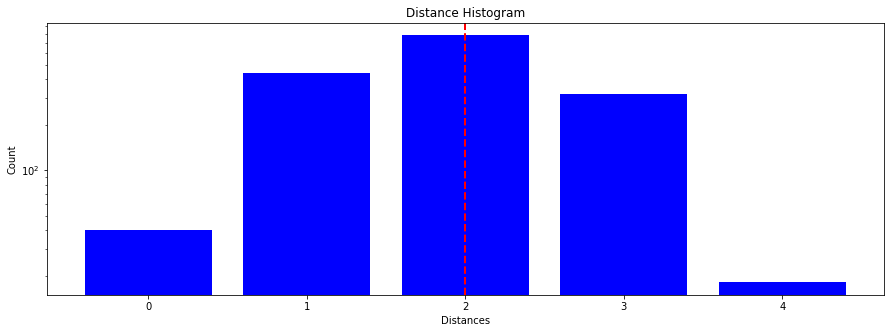

In [18]:
distance = sorted(list(reform.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
distCount = collections.Counter(distance)
dist, cnt = zip(*distCount.items())

avg_dist= np.mean(dist)
print avg_dist

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(dist, cnt, width=0.80, color='b', log=True)

plt.title("Distance Histogram")
plt.ylabel("Count")
plt.xlabel("Distances")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(avg_dist, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [19]:

df = pd.Series(reform).rename_axis(['src', 'target']).reset_index(name='path')

In [20]:
with open("distance.csv","w") as f:
    df.to_csv(path_or_buf=f, sep=';', encoding='ascii', index=False)

In [21]:
avg_dist = nx.average_shortest_path_length(G)
avg_dist

1.9448717948717948

In [23]:
diameter = nx.diameter(G)
print(diameter)

4


### Detect the communities in the graph, and discuss the results

In [42]:
#first compute the best partition
partition = community.best_partition(G)

In [124]:
colors = plt.cm.colors._colors_full_map.keys()
colors = [str(x) for x in colors]

0.333333333333
0.666666666667
1.0


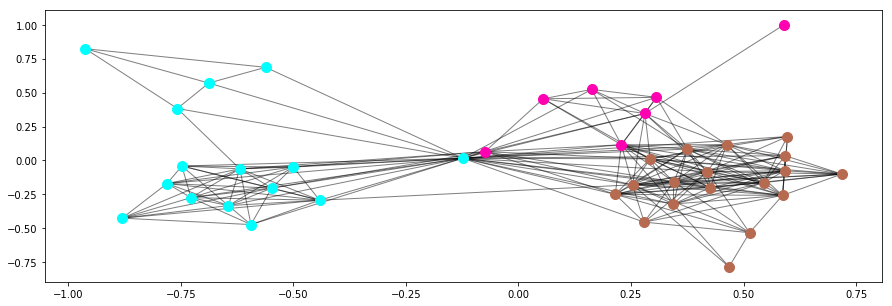

In [133]:
#drawing
import random

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    print (str(count/size))
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 100,
                                node_color=random.choice(colors))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [140]:
print(np.sum(nx.triangles(G).values()), np.sum(nx.triangles(R).values()))

(1875, 657)


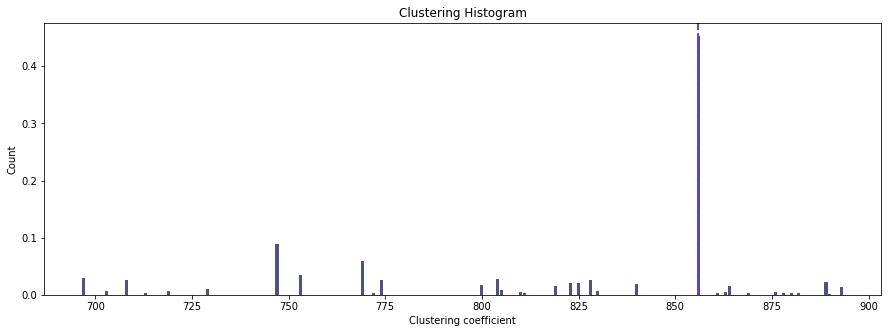

In [174]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

centrality = nx.betweenness_centrality(G, normalized=True, seed=42)
center, cnt = zip(*centrality.items())

#fig, ax = plt.subplots()
plt.bar(center, cnt, width=0.80, color=random.choice(colors), log=False)
#plt.scatter(center, cnt)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(max(centrality, key=centrality.get), color=random.choice(colors), linestyle='dashed', 
            linewidth=2, label='central node', visible=True)
plt.show()


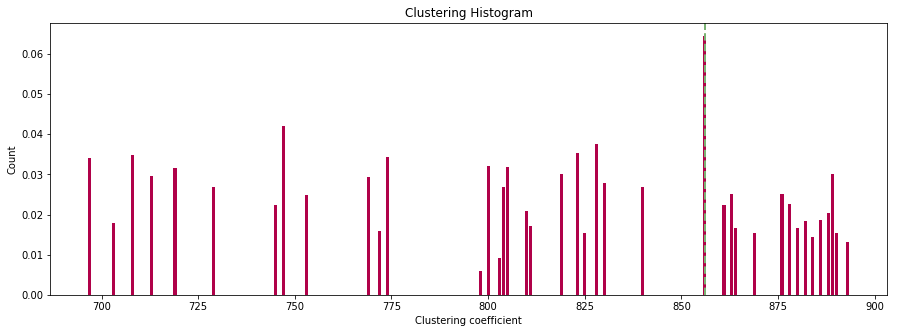

In [181]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

pagerank = nx.pagerank_numpy(G,)
nodes, cnt = zip(*pagerank.items())

#fig, ax = plt.subplots()
plt.bar(nodes, cnt, width=0.80, color=random.choice(colors), log=False)
#plt.scatter(center, cnt)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
plt.axvline(max(pagerank, key=pagerank.get), color=random.choice(colors), linestyle='dashed',
            linewidth=2, label='central node', visible=True)
plt.show()
